# Importing Libraries and DataSets

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ankittchaurasia/Data-Science/main/SmsSpamDetector/data.csv')

In [4]:
df.columns = ['target','text']
df.head()

,target,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [5]:
df.shape

(5571, 2)

In [ ]:
# 1. Data cleaning
# 2. Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model building
# 5. Deployment

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5571 non-null   object
 1   text    5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [20]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# check for duplicate values
df.duplicated().sum()

403

In [22]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5168, 2)

# 2.EDA

In [25]:
df['target'].value_counts()

0    4515
1     653
Name: target, dtype: int64

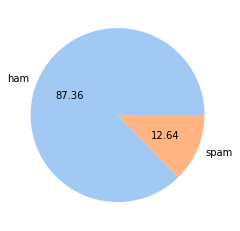

<Figure size 1080x432 with 0 Axes>

In [26]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['target'].value_counts(), labels=['ham','spam'], colors=colors,autopct="%0.2f")
plt.figure(figsize=(15,6))
plt.show()

In [ ]:
# Data is imbalanced

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len)

<ipython-input-28-f0cf0a313c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [29]:
df.head()

,target,text,num_characters
0,0,Ok lar... Joking wif u oni...,29
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,0,U dun say so early hor... U c already then say...,49
3,0,"Nah I don't think he goes to usf, he lives aro...",61
4,1,FreeMsg Hey there darling it's been 3 week's n...,147


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-30-7b1825ae98a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,Ok lar... Joking wif u oni...,29,8
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,0,U dun say so early hor... U c already then say...,49,13
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-32-17fdd65f9b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5168.000000,5168.000000,5168.000000
mean,79.338816,18.607779,1.955302
std,58.443252,13.420677,1.367648
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.250000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.897453,17.283278,1.806645
std,56.720376,13.609552,1.282806
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.765697,2.983155
std,29.821348,6.992892,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


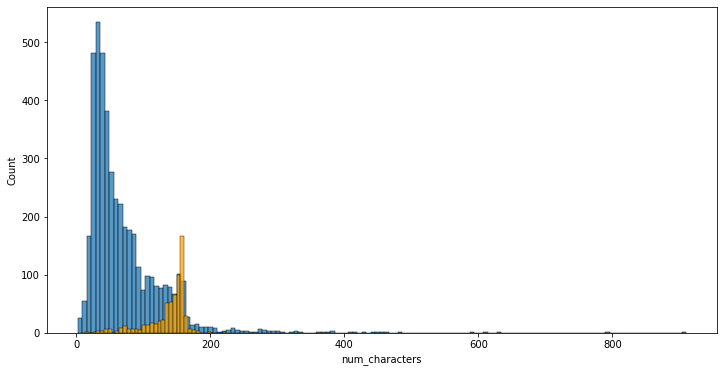

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color="orange")

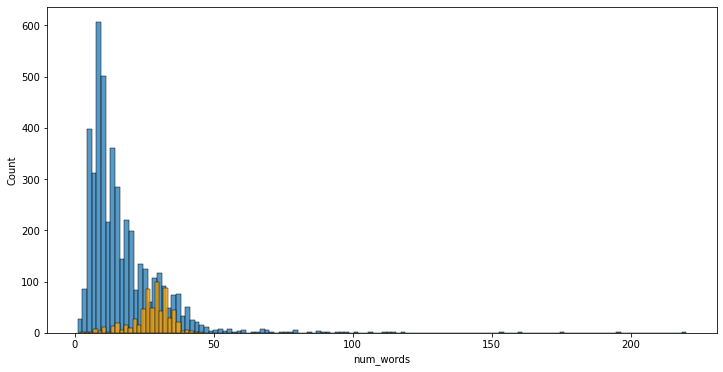

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='orange')

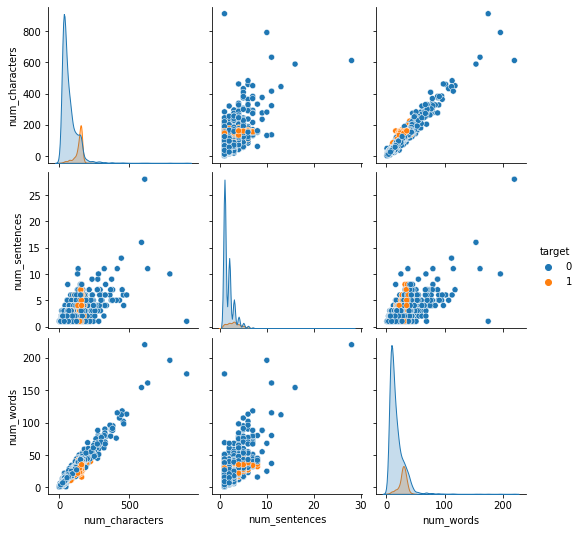

In [ ]:
sns.pairplot(df,hue='target')

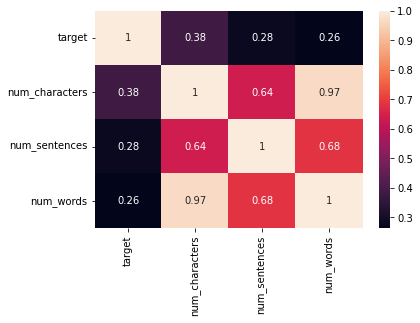

In [ ]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-40-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [42]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

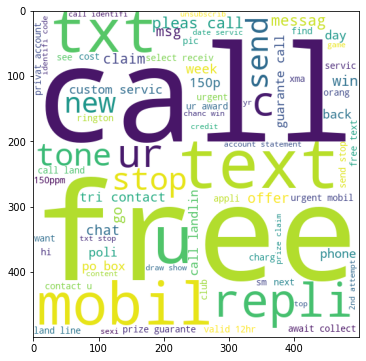

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

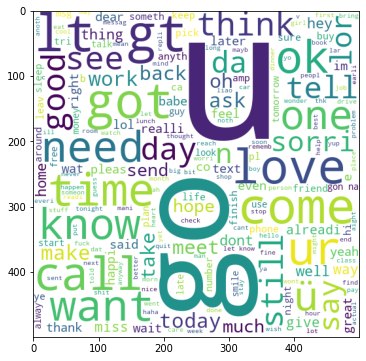

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [49]:
len(spam_corpus)

9983

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


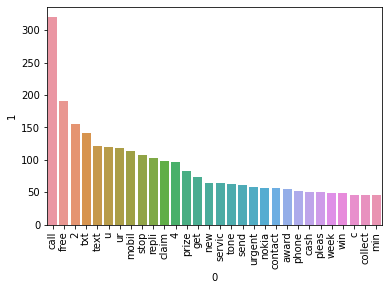

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35929

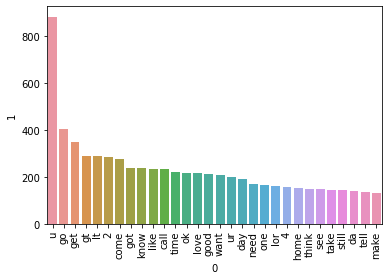

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [53]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(5168, 3000)

In [58]:
y = df['target'].values

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
mnb = MultinomialNB()

In [61]:
mnb.fit(X_train,y_train)
y_predict = mnb.predict(X_test)

In [62]:
accuracy_score(y_test, y_predict)

0.971953578336557

In [63]:
precision_score(y_test, y_predict)

0.9907407407407407

#Deploying

In [65]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))